In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../raw_data/Historical_Emissions_simp.csv")
pd.set_option('display.max_columns', None)
data.head()


,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn)
0,42694,Erste Group Bank AG,2005,Financials,Banks,Banks,Diversified Banks,7596.054435,6814.325028,1.347260,1.208610,0.000000,5638.151346
1,42694,Erste Group Bank AG,2006,Financials,Banks,Banks,Diversified Banks,12552.501135,10906.081210,1.308070,1.136500,0.000000,9596.196598
2,42694,Erste Group Bank AG,2007,Financials,Banks,Banks,Diversified Banks,11476.177472,9656.932392,1.270021,1.068693,0.000000,9036.210000
3,42694,Erste Group Bank AG,2008,Financials,Banks,Banks,Diversified Banks,11104.953114,19302.583214,1.139229,1.980203,0.000000,9747.780000
4,42694,Erste Group Bank AG,2009,Financials,Banks,Banks,Diversified Banks,28018.732600,65432.344312,2.403201,5.612213,94.431432,11658.920000


In [61]:
all_oil =data[data["GICS Industry Name"]=='Oil, Gas & Consumable Fuels']

In [64]:
oil = all_oil[(all_oil["Financial Year"]>=2010) & (all_oil["Financial Year"]<=2020)]

In [65]:
oil

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn)
213,42717,Woodside Energy Group Ltd,2010,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.258013e+06,22282.000000,538.519653,5.314095,100.0,4193.000000
214,42717,Woodside Energy Group Ltd,2011,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.888694e+06,18637.580078,393.314101,3.881212,100.0,4802.000000
215,42717,Woodside Energy Group Ltd,2012,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,3.815966e+06,37655.839844,601.128896,5.931922,100.0,6348.000000
216,42717,Woodside Energy Group Ltd,2013,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,9.884880e+06,7641.000000,1668.052634,1.289403,100.0,5926.000000
217,42717,Woodside Energy Group Ltd,2014,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.000723e+07,7622.000000,1345.962600,1.025151,100.0,7435.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130345,247294,Hindustan Oil Exploration Company Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.202759e+04,1382.351000,421.942000,48.495000,0.0,28.505307
130410,247360,"JC Chemical Co., Ltd.",2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,5.104816e+04,7240.055000,224.955000,31.905000,0.0,226.925832
130565,247533,New Fortress Energy Inc.,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,9.678890e+05,46781.000000,2143.007000,103.578000,100.0,451.650000
130627,247608,Peninsula Energy Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Coal & Consumable Fuels,6.553500e+02,1618.294000,107.823000,266.254000,0.0,6.078000


In [66]:
num_compay_lines = oil.groupby("Company").count().reset_index()[["Company", "TCUID"]]

In [85]:
num_compay_lines

,Company,TCUID
0,AAG Energy Holdings Limited,2
1,APA Corporation,11
2,ARC Resources Ltd.,11
3,AVIC Joy Holdings (HK) Limited,1
4,AWE Ltd,8
...,...,...
658,Yankuang Energy Group Company Limited,11
659,Yuan Heng Gas Holdings Limited,5
660,Z Energy Limited,5
661,Zhengzhou Coal Mining Machinery Group Company ...,1


In [92]:
relevant = num_compay_lines['Company']
relevant

0                            AAG Energy Holdings Limited
1                                        APA Corporation
2                                     ARC Resources Ltd.
3                         AVIC Joy Holdings (HK) Limited
4                                                AWE Ltd
                             ...                        
658                Yankuang Energy Group Company Limited
659                       Yuan Heng Gas Holdings Limited
660                                     Z Energy Limited
661    Zhengzhou Coal Mining Machinery Group Company ...
662    Zhongxing Tianheng Energy Technology (Beijing)...
Name: Company, Length: 663, dtype: object

In [86]:
 companieswith11 = num_compay_lines[num_compay_lines ["TCUID"] > 10]

In [93]:
companieswith11['Company']

1                            APA Corporation
2                         ARC Resources Ltd.
23                             Ampol Limited
47                                 BP p.l.c.
51              Banpu Public Company Limited
                       ...                  
633                    Vermilion Energy Inc.
640                       W&T Offshore, Inc.
647                  Whitehaven Coal Limited
651                  Wintime Energy Co.,Ltd.
658    Yankuang Energy Group Company Limited
Name: Company, Length: 114, dtype: object

In [94]:
final = oil[oil["Company"].isin(companieswith11['Company'])]

In [95]:
final

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn)
5422,43396,Eni S.p.A.,2010,Energy,Energy,"Oil, Gas & Consumable Fuels",Integrated Oil & Gas,6.077195e+07,3.280291e+06,466.138231,25.160770,99.958340,130373.230000
5423,43396,Eni S.p.A.,2011,Energy,Energy,"Oil, Gas & Consumable Fuels",Integrated Oil & Gas,5.118992e+07,1.246554e+06,335.873647,8.179043,99.941924,152408.280000
5424,43396,Eni S.p.A.,2012,Energy,Energy,"Oil, Gas & Consumable Fuels",Integrated Oil & Gas,5.258705e+07,8.962791e+05,321.810112,5.484842,99.950276,163410.200000
5425,43396,Eni S.p.A.,2013,Energy,Energy,"Oil, Gas & Consumable Fuels",Integrated Oil & Gas,4.735737e+07,8.148187e+05,299.564904,5.154236,99.946825,158087.188454
5426,43396,Eni S.p.A.,2014,Energy,Energy,"Oil, Gas & Consumable Fuels",Integrated Oil & Gas,4.294821e+07,6.722950e+05,294.759381,4.614051,99.946335,145706.007788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125881,238862,"Comstock Resources, Inc.",2014,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.438679e+05,2.953702e+04,259.113569,53.197722,0.000000,555.231000
125882,238862,"Comstock Resources, Inc.",2015,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,6.238739e+04,1.277243e+04,247.155126,50.599525,0.000000,252.422000
125883,238862,"Comstock Resources, Inc.",2016,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,7.654279e+04,9.066481e+03,435.629907,51.600296,0.000000,175.705994
125884,238862,"Comstock Resources, Inc.",2017,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.221448e+05,1.426091e+04,478.378433,55.852655,0.000000,255.330996


In [101]:
gas_by_yr = final.groupby("Financial Year").mean()
gas_by_yr

,TCUID,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn)
Financial Year,,,,,,,
2010,67726.833333,1.100610e+07,9.856441e+05,757.877171,67.474810,50.086550,25721.050323
2011,67726.833333,1.213416e+07,1.018919e+06,701.852560,54.777191,58.179300,31706.240528
2012,67726.833333,1.251502e+07,9.221399e+05,825.438690,55.284748,61.687117,31155.385230
2013,67726.833333,1.220220e+07,1.066471e+06,652.618265,70.608345,65.332791,31505.289098
2014,67726.833333,1.313833e+07,1.234206e+06,768.156159,76.413750,66.384398,29881.332666
2015,67726.833333,1.262499e+07,1.031299e+06,936.000193,78.487117,67.272982,20264.233056
2016,67726.833333,1.429261e+07,9.382512e+05,1375.757213,81.745442,68.077858,17359.434113
2017,67726.833333,1.457288e+07,1.024474e+06,952.085598,78.652598,72.218990,21333.168051
2018,67726.833333,1.476592e+07,1.049748e+06,813.557897,71.189424,75.427107,25933.881751


<AxesSubplot:xlabel='Financial Year'>

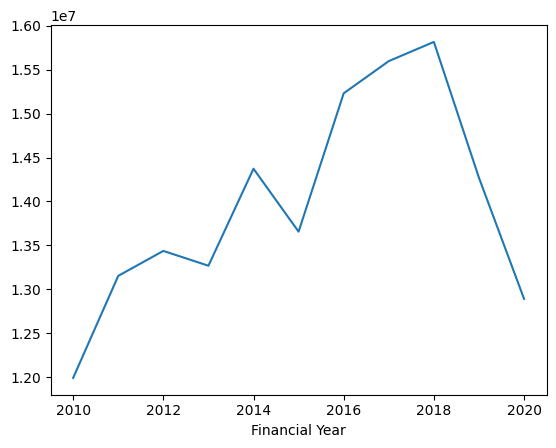

In [102]:
gas_by_yr_mean= gas_by_yr["Carbon-Scope 1 (tonnes CO2e)"] + gas_by_yr["Carbon-Scope 2 (tonnes CO2e)"]
gas_by_yr_mean.plot()

In [103]:
gas_by_yr2 = final.groupby("Financial Year").sum()
gas_by_yr2

,TCUID,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn)
Financial Year,,,,,,,
2010,7720859,1.254696e+09,1.123634e+08,86397.997481,7692.128374,5709.866751,2.932200e+06
2011,7720859,1.383294e+09,1.161568e+08,80011.191823,6244.599795,6632.440146,3.614511e+06
2012,7720859,1.426712e+09,1.051239e+08,94100.010669,6302.461242,7032.331355,3.551714e+06
2013,7720859,1.391051e+09,1.215777e+08,74398.482192,8049.351310,7447.938119,3.591603e+06
2014,7720859,1.497770e+09,1.406995e+08,87569.802180,8711.167490,7567.821358,3.406472e+06
2015,7720859,1.439249e+09,1.175681e+08,106704.021961,8947.531374,7669.119946,2.310123e+06
2016,7720859,1.629357e+09,1.069606e+08,156836.322322,9318.980337,7760.875828,1.978975e+06
2017,7720859,1.661308e+09,1.167900e+08,108537.758146,8966.396129,8232.964881,2.431981e+06
2018,7720859,1.683315e+09,1.196712e+08,92745.600278,8115.594361,8598.690192,2.956463e+06


<AxesSubplot:xlabel='Financial Year'>

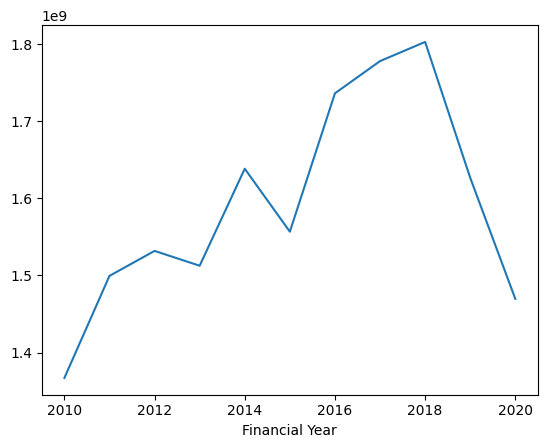

In [104]:
gas_by_yr_sum= gas_by_yr2["Carbon-Scope 1 (tonnes CO2e)"] + gas_by_yr2["Carbon-Scope 2 (tonnes CO2e)"]
gas_by_yr_sum.plot()